In [3]:
from pre3 import data_pre
from input_data import input_df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = input_df()
df = data_pre(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47008266
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         651975 non-null  object 
 1   市区町村名         651975 non-null  object 
 2   地区名           651318 non-null  object 
 3   最寄駅：名称        649342 non-null  object 
 4   最寄駅：距離（分）     628916 non-null  float64
 5   間取り           629546 non-null  object 
 6   面積（㎡）         651975 non-null  float64
 7   建築年           633280 non-null  float64
 8   建物の構造         637098 non-null  object 
 9   用途            601333 non-null  object 
 10  今後の利用目的       288948 non-null  object 
 11  都市計画          633162 non-null  object 
 12  建ぺい率（％）       629168 non-null  float64
 13  容積率（％）        629168 non-null  float64
 14  取引時点          651975 non-null  float64
 15  改装            593301 non-null  object 
 16  取引の事情等        18397 non-null   object 
 17  取引価格（総額）_log  651975 non-null  float64
 

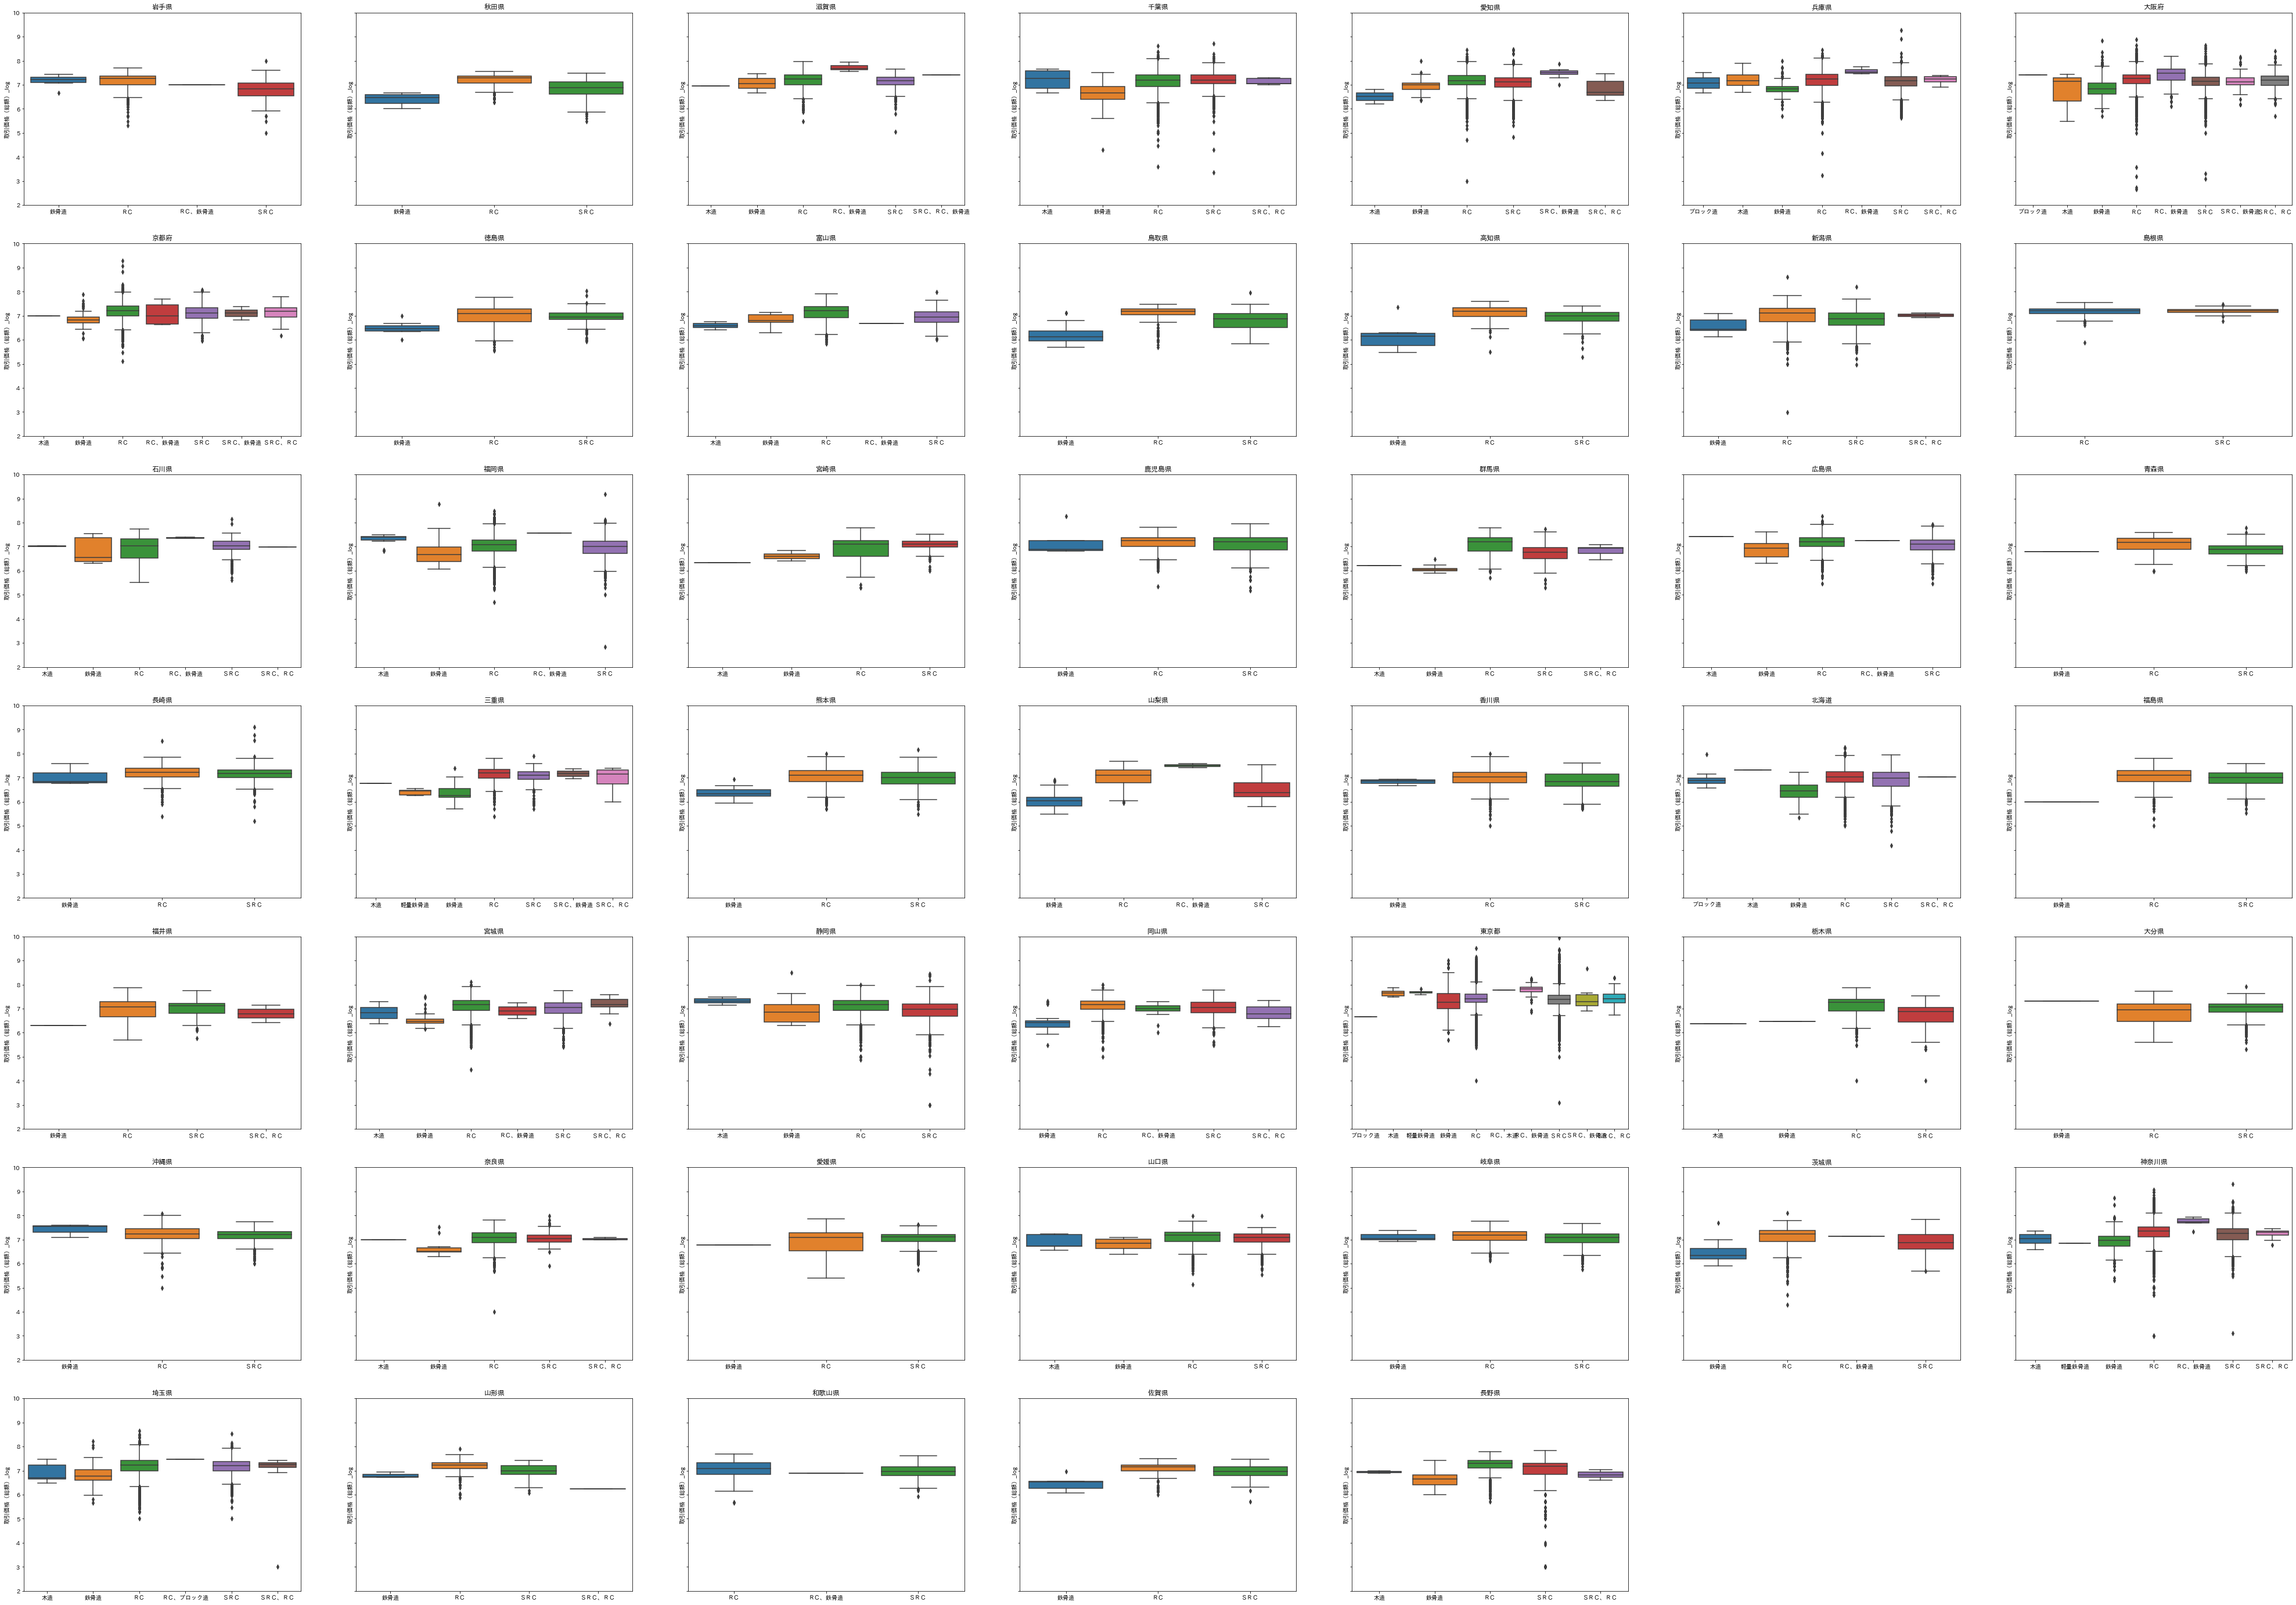

In [4]:
# 仮説 : 建物の構造によって価格が違うのではないか
import seaborn as sns
pref_list = df["都道府県名"].tolist()
pref_list = set(pref_list)

fig, ax = plt.subplots(7, 7, figsize=(70, 50), sharey=True)
for i, pref in enumerate(pref_list):
    sns.boxplot(
        x='建物の構造', y='取引価格（総額）_log',
        data=df[df.都道府県名==pref].sort_values('建物の構造'),
        ax=ax[divmod(i, 7)]).set(title=pref, xlabel=None, ylim=(2, 10))

# hide excess graphs
for i in range(len(pref_list)-7*7, 0):
  ax[-1, i].axis('off')


plt.show()

[Text(0.5, 0, ''), (2.0, 10.0)]

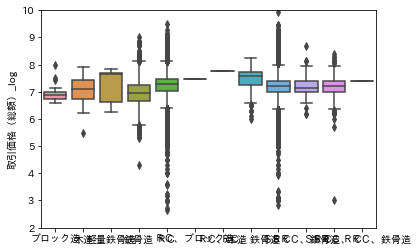

In [5]:
sns.boxplot(x='建物の構造', y='取引価格（総額）_log',data=df.sort_values('建物の構造')).set(xlabel=None, ylim=(2, 10))

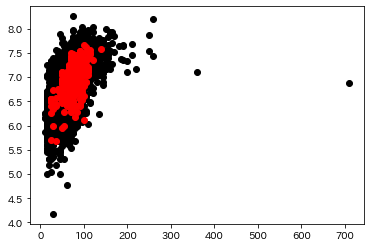

In [6]:
import numpy as np
# 各県の都市部から離れているほうが価格が安い
# 山梨県

pref = "北海道"
area = "小樽市"

data =  df[df["都道府県名"]==pref].reset_index()

main = data[data["市区町村名"]==area]
nmain = data[data["市区町村名"]!=area]

plt.scatter(nmain['面積（㎡）'], nmain['取引価格（総額）_log'], color='black')
plt.scatter(main['面積（㎡）'], main['取引価格（総額）_log'], color='red')
plt.show()


In [32]:
df = df[["都道府県名", "市区町村名", "面積（㎡）", "取引価格（総額）_log"]]
main_area = []

df["平均価格"] = df["取引価格（総額）_log"] / df["面積（㎡）"]

for pref in pref_list:
    data = df[df["都道府県名"]==pref].groupby('市区町村名').mean()
    i = data["平均価格"].max()
    area = data[data["平均価格"] == i].index[0]
    main_area.append(area)

In [33]:
len(main_area)

47

In [34]:
main_area

['盛岡市',
 '秋田市',
 '東近江市',
 '市原市',
 '名古屋市中区',
 '神戸市中央区',
 '大阪市浪速区',
 '京都市下京区',
 '徳島市',
 '高岡市',
 '鳥取市',
 '高知市',
 '長岡市',
 '松江市',
 '小松市',
 '福岡市博多区',
 '延岡市',
 '鹿児島市',
 '前橋市',
 '広島市中区',
 '弘前市',
 '長崎市',
 '三重郡朝日町',
 '熊本市中央区',
 '甲府市',
 '高松市',
 '札幌市北区',
 '福島市',
 '福井市',
 '宮城郡松島町',
 '浜松市浜北区',
 '津山市',
 '新宿区',
 '那須塩原市',
 '別府市',
 '那覇市',
 '宇陀市',
 '松山市',
 '山口市',
 '美濃加茂市',
 'ひたちなか市',
 '横浜市西区',
 'さいたま市大宮区',
 '山形市',
 '和歌山市',
 '佐賀市',
 '長野市']

In [35]:
area_axis = pd.read_csv('area_axis.csv')

In [38]:
!pip install tqdm

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [41]:
!pip install beautifulsoup4

     |████████████████████████████████| 115 kB 13.5 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [44]:
!pip install bs4
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm


def get_lat_lon_from_address(address_l):

    url = 'http://www.geocoding.jp/api/'
    latlons = []
    for address in tqdm(address_l):
        payload = {"v": 1.1, 'q': address}
        r = requests.get(url, params=payload)
        ret = BeautifulSoup(r.content,'lxml')
        if ret.find('error'):
            raise ValueError(f"Invalid address submitted. {address}")
        else:
            lat = ret.find('lat').string
            lon = ret.find('lng').string
            latlons.append([lat,lon])
            time.sleep(5)
    return latlons

main_area_axis = get_lat_lon_from_address(main_area)

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


100%|██████████| 47/47 [04:46<00:00,  6.11s/it]


In [45]:
main_dict = dict(zip(pref_list, main_area_axis))

In [54]:
main_dict

{'岩手県': ['39.701956', '141.15433'],
 '秋田県': ['39.719967', '140.10348'],
 '滋賀県': ['35.112626', '136.207575'],
 '千葉県': ['35.497882', '140.114867'],
 '愛知県': ['35.160804', '136.907689'],
 '兵庫県': ['34.667381', '135.214988'],
 '大阪府': ['34.661106', '135.494556'],
 '京都府': ['34.992615', '135.756837'],
 '徳島県': ['34.070365', '134.554954'],
 '富山県': ['36.754112', '137.025764'],
 '鳥取県': ['35.501108', '134.235101'],
 '高知県': ['33.558882', '133.531238'],
 '新潟県': ['37.446519', '138.85135'],
 '島根県': ['35.468191', '133.048406'],
 '石川県': ['36.408421', '136.445853'],
 '福岡県': ['33.590342', '130.441447'],
 '宮崎県': ['32.58232', '131.665141'],
 '鹿児島県': ['31.596854', '130.557139'],
 '群馬県': ['36.389467', '139.063413'],
 '広島県': ['34.381432', '132.447902'],
 '青森県': ['40.603063', '140.464054'],
 '長崎県': ['32.750333', '129.877889'],
 '三重県': ['35.034295', '136.664476'],
 '熊本県': ['32.802657', '130.725996'],
 '山梨県': ['35.662133', '138.5683'],
 '香川県': ['34.342542', '134.046541'],
 '北海道': ['43.144873', '141.358562'],
 '福島県'

In [61]:
import json

with open("main_area_dict.json", "w") as tf:
    json.dump(main_dict,tf)

In [63]:
def json_load(path):
    with open(path, mode='r') as f:
        data = json.load(f)
        return data

main_dict = json_load('main_area_dict.json')

In [64]:
main_dict

{'岩手県': ['39.701956', '141.15433'],
 '秋田県': ['39.719967', '140.10348'],
 '滋賀県': ['35.112626', '136.207575'],
 '千葉県': ['35.497882', '140.114867'],
 '愛知県': ['35.160804', '136.907689'],
 '兵庫県': ['34.667381', '135.214988'],
 '大阪府': ['34.661106', '135.494556'],
 '京都府': ['34.992615', '135.756837'],
 '徳島県': ['34.070365', '134.554954'],
 '富山県': ['36.754112', '137.025764'],
 '鳥取県': ['35.501108', '134.235101'],
 '高知県': ['33.558882', '133.531238'],
 '新潟県': ['37.446519', '138.85135'],
 '島根県': ['35.468191', '133.048406'],
 '石川県': ['36.408421', '136.445853'],
 '福岡県': ['33.590342', '130.441447'],
 '宮崎県': ['32.58232', '131.665141'],
 '鹿児島県': ['31.596854', '130.557139'],
 '群馬県': ['36.389467', '139.063413'],
 '広島県': ['34.381432', '132.447902'],
 '青森県': ['40.603063', '140.464054'],
 '長崎県': ['32.750333', '129.877889'],
 '三重県': ['35.034295', '136.664476'],
 '熊本県': ['32.802657', '130.725996'],
 '山梨県': ['35.662133', '138.5683'],
 '香川県': ['34.342542', '134.046541'],
 '北海道': ['43.144873', '141.358562'],
 '福島県'

In [68]:
!pip install geopy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [75]:
from geopy.distance import geodesic

def area_dis(x):
    
    pref = x["都道府県名"]
    main_axis = main_dict[pref]
    ido = x["緯度"]
    kei = x["経度"]
    m_ido = main_axis[0]
    m_kei = main_axis[1]
    
    tu = (ido, kei)
    mtu = (m_ido, m_kei)
    
    dis = geodesic(tu, mtu).km

    return dis
    

df["都市距離"] = df.apply(lambda x: area_dis(x), axis=1)

In [76]:
df.head()

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,緯度,経度,クラスタ平均,都市距離
ID,,,,,,,,,,,,,,,,,,,,,
1117225,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,120.0,12.0,ＲＣ,住宅,...,60.0,200.0,2018.75,未改装,NaN,7.431364,42.631246,141.603122,2.0,60.455317
1114724,北海道,苫小牧市,青葉町,青葉,9.0,３ＬＤＫ,70.0,35.0,ＲＣ,住宅,...,60.0,200.0,2017.75,未改装,NaN,6.342423,42.631246,141.603122,2.0,60.455317
1114753,北海道,苫小牧市,青葉町,青葉,3.0,３ＬＤＫ,70.0,31.0,ＲＣ,住宅,...,60.0,200.0,2016.50,改装済,NaN,6.778151,42.631246,141.603122,2.0,60.455317
1120806,北海道,苫小牧市,表町,苫小牧,8.0,４ＬＤＫ,105.0,18.0,ＲＣ,住宅,...,80.0,400.0,2011.99,未改装,NaN,7.230449,42.631246,141.603122,2.0,60.455317
1117264,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,90.0,15.0,ＲＣ,住宅,...,60.0,200.0,2015.50,未改装,NaN,7.204120,42.631246,141.603122,2.0,60.455317


In [79]:
d

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,緯度,経度,クラスタ平均
ID,,,,,,,,,,,,,,,,,,,,,
1117225,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,120.0,12.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2018.75,未改装,NaN,7.431364,42.631246,141.603122,2.0
1114724,北海道,苫小牧市,青葉町,青葉,9.0,３ＬＤＫ,70.0,35.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2017.75,未改装,NaN,6.342423,42.631246,141.603122,2.0
1114753,北海道,苫小牧市,青葉町,青葉,3.0,３ＬＤＫ,70.0,31.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2016.50,改装済,NaN,6.778151,42.631246,141.603122,2.0
1120806,北海道,苫小牧市,表町,苫小牧,8.0,４ＬＤＫ,105.0,18.0,ＲＣ,住宅,...,商業地域,80.0,400.0,2011.99,未改装,NaN,7.230449,42.631246,141.603122,2.0
1117264,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,90.0,15.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2015.50,未改装,NaN,7.204120,42.631246,141.603122,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47008534,沖縄県,うるま市,字宮里,NaN,NaN,４ＬＤＫ,65.0,10.0,ＳＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2019.75,未改装,NaN,7.342423,26.378685,127.857493,3.0
47007866,沖縄県,うるま市,字江洲,NaN,NaN,３ＬＤＫ,70.0,6.0,ＲＣ,住宅,...,準住居地域,60.0,200.0,2018.99,改装済,NaN,7.447158,26.378685,127.857493,3.0
47029524,沖縄県,うるま市,字塩屋,NaN,NaN,３ＬＤＫ,75.0,22.0,ＲＣ,住宅,...,市街化区域及び市街化調整区域外の都市計画区域,60.0,100.0,2009.99,未改装,NaN,7.000000,26.378685,127.857493,3.0
